<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/keras_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)


2.1.0
2.2.4-tf


In [0]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [0]:
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [0]:
import pandas as pd

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train_df = pd.DataFrame(X_train, columns = cols)
X_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [0]:
X_train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
from sklearn.preprocessing import minmax_scale

X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_in, n_out = 13, 1
n_hidden = 10

model = Sequential()
model.add(Dense(n_out, activation = 'relu', input_shape = (n_in,)))
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

hist = model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_split = 0.2, verbose = 0)

perf = model.evaluate(X_test, y_test, batch_size = 100)
perf

102/102 [==============================] - 0s 49us/sample - loss: 82.8622 - mse: 82.8622


[82.86216137455959, 82.86216]

In [0]:
df_hist = pd.DataFrame(hist.history)

df_hist.head(10)

,loss,mse,val_loss,val_mse
0,530.867699,530.867676,455.516357,455.516357
1,349.810122,349.810120,313.284485,313.284485
2,240.341929,240.341919,227.462967,227.462967
3,176.878682,176.878677,180.364914,180.364914
4,143.163808,143.163818,151.106354,151.106354
5,123.227680,123.227676,132.516510,132.516510
6,111.165962,111.165962,121.246506,121.246506
7,104.187824,104.187828,113.302422,113.302422
8,99.017412,99.017410,108.647675,108.647675
9,95.755760,95.755760,104.302170,104.302170


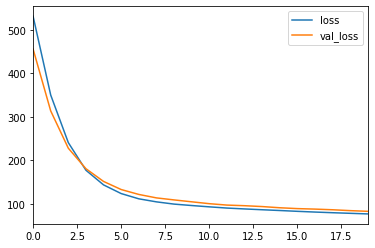

In [0]:
ax = df_hist[['loss', 'val_loss']].plot()